In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import plotly.offline as py
import plotly.graph_objs as go

In [2]:
def exponential(x, a, b, c):
    return a* np.exp(-b*x) + c

In [5]:
temp = pd.read_csv("TEMP_DATA_20170404.csv")
temp.Date = pd.to_datetime(temp.Date)
temp.set_index("Date",inplace=True)

In [112]:
temp = temp.loc["2017-04-05 19:34:00":"2017-04-06 7:08:00"]
x = np.arange(695)
y = temp.BAS_2.values#change accordingly

In [117]:
popt, pcov = curve_fit(exponential,x,y)

In [118]:
#tuple unpacking of coefficients
a,b,c = popt
tc = 1/b

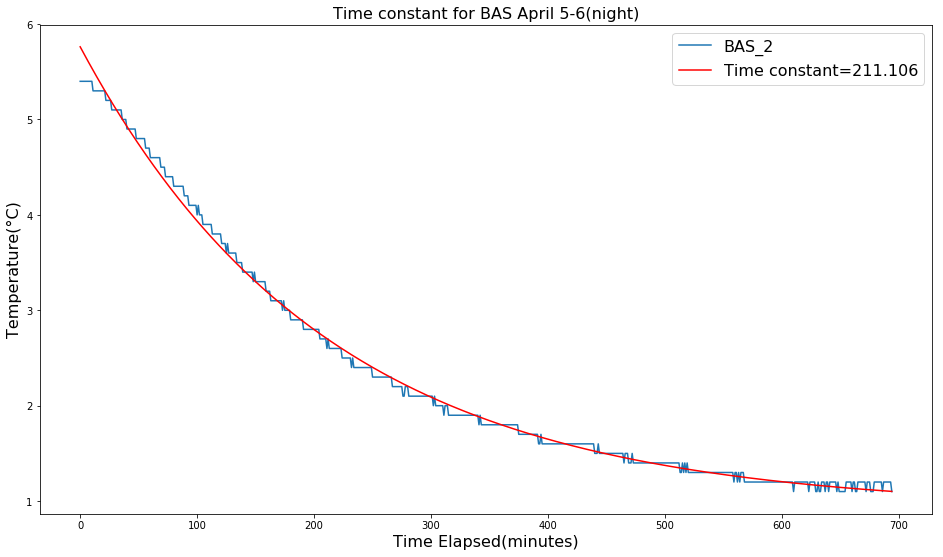

In [119]:
plt.figure(figsize=(16,9))
font = {"size":16}
plt.plot(x,y,label="BAS_2")
plt.plot(x,exponential(x,*popt),"r-",label="Time constant=%.3f" %tc)
plt.title("Time constant for BAS April 5-6(night)",fontdict=font)
plt.xlabel("Time Elapsed(minutes)",fontdict=font)
plt.ylabel("Temperature(°C)",fontdict=font)
plt.legend(prop={"size":16})
plt.savefig("BAS Time constant 5-6(night).png")